### 6,7,8,15)	Implement the Continuous Bag of Words (CBOW) Model for the given (textual document 1) using the below steps:
a.	Data preparation
b.	Generate training data
c.	Train model
d.	Output


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA 
# Princiapl Componenet Analysis - makes data ez to visualize (2 dimensions)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Lambda
#dense - fully connected layer, embedding - it is a table of arrays,lambda - lambda function inshort
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
#same = lambda x: x*2
#same(3)

In [3]:
#to open the file in python code we use "with open()"

with open("./CBOW.txt","r") as file:
    text = file.read()

text

'The speed of transmission is an important point of difference between the two viruses. Influenza has a shorter median incubation period (the time from infection to appearance of symptoms) and a shorter serial interval (the time between successive cases) than COVID-19 virus. The serial interval for COVID-19 virus is estimated to be 5-6 days, while for influenza virus, the serial interval is 3 days. This means that influenza can spread faster than COVID-19. \n\nFurther, transmission in the first 3-5 days of illness, or potentially pre-symptomatic transmission transmission of the virus before the appearance of symptoms is a major driver of transmission for influenza. In contrast, while we are learning that there are people who can shed COVID-19 virus 24-48 hours prior to symptom onset, at present, this does not appear to be a major driver of transmission. \n\nThe reproductive number the number of secondary infections generated from one infected individual is understood to be between 2 an

In [4]:
text=text.lower()
text = text.replace('\n','')
text = text.replace('(','')
text = text.replace(')','')
text = text.replace('-','')
text = text.replace(',','')
text

'the speed of transmission is an important point of difference between the two viruses. influenza has a shorter median incubation period the time from infection to appearance of symptoms and a shorter serial interval the time between successive cases than covid19 virus. the serial interval for covid19 virus is estimated to be 56 days while for influenza virus the serial interval is 3 days. this means that influenza can spread faster than covid19. further transmission in the first 35 days of illness or potentially presymptomatic transmission transmission of the virus before the appearance of symptoms is a major driver of transmission for influenza. in contrast while we are learning that there are people who can shed covid19 virus 2448 hours prior to symptom onset at present this does not appear to be a major driver of transmission. the reproductive number the number of secondary infections generated from one infected individual is understood to be between 2 and 2.5 for covid19 virus hig

In [5]:
cleaned_text = ''

for word in text:
    if not word.isdigit():
        cleaned_text += word
        
cleaned_text

'the speed of transmission is an important point of difference between the two viruses. influenza has a shorter median incubation period the time from infection to appearance of symptoms and a shorter serial interval the time between successive cases than covid virus. the serial interval for covid virus is estimated to be  days while for influenza virus the serial interval is  days. this means that influenza can spread faster than covid. further transmission in the first  days of illness or potentially presymptomatic transmission transmission of the virus before the appearance of symptoms is a major driver of transmission for influenza. in contrast while we are learning that there are people who can shed covid virus  hours prior to symptom onset at present this does not appear to be a major driver of transmission. the reproductive number the number of secondary infections generated from one infected individual is understood to be between  and . for covid virus higher than for influenza

In [6]:
# Splitting the text into sentences
sentences = cleaned_text.split('. ')
sentences

['the speed of transmission is an important point of difference between the two viruses',
 'influenza has a shorter median incubation period the time from infection to appearance of symptoms and a shorter serial interval the time between successive cases than covid virus',
 'the serial interval for covid virus is estimated to be  days while for influenza virus the serial interval is  days',
 'this means that influenza can spread faster than covid',
 'further transmission in the first  days of illness or potentially presymptomatic transmission transmission of the virus before the appearance of symptoms is a major driver of transmission for influenza',
 'in contrast while we are learning that there are people who can shed covid virus  hours prior to symptom onset at present this does not appear to be a major driver of transmission',
 'the reproductive number the number of secondary infections generated from one infected individual is understood to be between  and ',
 'for covid virus hig

In [7]:
#tokenize the sentences
#conver text to number
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)
print(sequences)

[[1, 33, 2, 3, 8, 34, 35, 36, 2, 37, 12, 1, 38, 19], [4, 39, 10, 20, 40, 41, 42, 1, 21, 22, 43, 9, 23, 2, 24, 11, 10, 20, 13, 14, 1, 21, 12, 44, 45, 15, 5, 6], [1, 13, 14, 7, 5, 6, 8, 46, 9, 16, 17, 25, 7, 4, 6, 1, 13, 14, 8, 17], [26, 47, 27, 4, 28, 48, 49, 15, 5], [50, 3, 29, 1, 51, 17, 2, 52, 53, 54, 55, 3, 3, 2, 1, 6, 56, 1, 23, 2, 24, 8, 10, 30, 31, 2, 3, 7, 4], [29, 57, 25, 58, 18, 59, 27, 60, 18, 61, 62, 28, 63, 5, 6, 64, 65, 9, 66, 67, 68, 69, 26, 70, 71, 72, 9, 16, 10, 30, 31, 2, 3], [1, 73, 32, 1, 32, 2, 74, 75, 76, 22, 77, 78, 79, 8, 80, 9, 16, 12, 11], [7, 5, 6, 81, 15, 7, 4], [82, 83, 7, 84, 5, 11, 4, 19, 18, 85, 86, 11, 87, 88, 89, 90, 91, 92], []]


In [8]:
idx2word = tokenizer.index_word
word2idx = tokenizer.word_index

print(idx2word,'\n')
print(word2idx)

{1: 'the', 2: 'of', 3: 'transmission', 4: 'influenza', 5: 'covid', 6: 'virus', 7: 'for', 8: 'is', 9: 'to', 10: 'a', 11: 'and', 12: 'between', 13: 'serial', 14: 'interval', 15: 'than', 16: 'be', 17: 'days', 18: 'are', 19: 'viruses', 20: 'shorter', 21: 'time', 22: 'from', 23: 'appearance', 24: 'symptoms', 25: 'while', 26: 'this', 27: 'that', 28: 'can', 29: 'in', 30: 'major', 31: 'driver', 32: 'number', 33: 'speed', 34: 'an', 35: 'important', 36: 'point', 37: 'difference', 38: 'two', 39: 'has', 40: 'median', 41: 'incubation', 42: 'period', 43: 'infection', 44: 'successive', 45: 'cases', 46: 'estimated', 47: 'means', 48: 'spread', 49: 'faster', 50: 'further', 51: 'first', 52: 'illness', 53: 'or', 54: 'potentially', 55: 'presymptomatic', 56: 'before', 57: 'contrast', 58: 'we', 59: 'learning', 60: 'there', 61: 'people', 62: 'who', 63: 'shed', 64: 'hours', 65: 'prior', 66: 'symptom', 67: 'onset', 68: 'at', 69: 'present', 70: 'does', 71: 'not', 72: 'appear', 73: 'reproductive', 74: 'secondary'

In [9]:
vocab_size = len(tokenizer.word_index) + 1 
#how mny unique words re there, add 1 bcoz 1st token id is 1 and not 0
#vocab_size is the number of unique words in the tokenizer's vocabulary plus one.

emb_size = 100
context_size = 3 #each word 3 words from left and 3 from right for training

contexts = []
targets = []

for sequence in sequences:
    if len(sequence) >= 2 * context_size + 1:
        for i in range(context_size, len(sequence) - context_size):
            target = sequence[i]
            context = sequence[i-context_size:i] + sequence[i+1:i+context_size+1]
            contexts.append(context)
            targets.append(target)

print(contexts, "\n")
print(targets)     

[[1, 33, 2, 8, 34, 35], [33, 2, 3, 34, 35, 36], [2, 3, 8, 35, 36, 2], [3, 8, 34, 36, 2, 37], [8, 34, 35, 2, 37, 12], [34, 35, 36, 37, 12, 1], [35, 36, 2, 12, 1, 38], [36, 2, 37, 1, 38, 19], [4, 39, 10, 40, 41, 42], [39, 10, 20, 41, 42, 1], [10, 20, 40, 42, 1, 21], [20, 40, 41, 1, 21, 22], [40, 41, 42, 21, 22, 43], [41, 42, 1, 22, 43, 9], [42, 1, 21, 43, 9, 23], [1, 21, 22, 9, 23, 2], [21, 22, 43, 23, 2, 24], [22, 43, 9, 2, 24, 11], [43, 9, 23, 24, 11, 10], [9, 23, 2, 11, 10, 20], [23, 2, 24, 10, 20, 13], [2, 24, 11, 20, 13, 14], [24, 11, 10, 13, 14, 1], [11, 10, 20, 14, 1, 21], [10, 20, 13, 1, 21, 12], [20, 13, 14, 21, 12, 44], [13, 14, 1, 12, 44, 45], [14, 1, 21, 44, 45, 15], [1, 21, 12, 45, 15, 5], [21, 12, 44, 15, 5, 6], [1, 13, 14, 5, 6, 8], [13, 14, 7, 6, 8, 46], [14, 7, 5, 8, 46, 9], [7, 5, 6, 46, 9, 16], [5, 6, 8, 9, 16, 17], [6, 8, 46, 16, 17, 25], [8, 46, 9, 17, 25, 7], [46, 9, 16, 25, 7, 4], [9, 16, 17, 7, 4, 6], [16, 17, 25, 4, 6, 1], [17, 25, 7, 6, 1, 13], [25, 7, 4, 1, 13,

In [10]:
X = np.array(contexts)
y = np.array(targets)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [12]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=emb_size, input_length=2 * context_size),
    Lambda(lambda x: tf.reduce_mean(x, axis=1)),
    Dense(128, activation='relu'),
    Dense(vocab_size, activation='softmax')
])

C:\Users\madha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

In [14]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, verbose=0)
#verbose = 0 means dont print the data

In [15]:
embeddings = model.layers[0].get_weights()[0]
print(embeddings)
#will display this matrix of learned word embeddings. 
#Each row corresponds to a word’s learned representation, capturing semantic information about words based on their contexts.

[[ 0.01920578  0.04425559 -0.04704088 ... -0.02411482 -0.03682852
   0.02359816]
 [-0.17955357  0.01107194 -0.2058752  ... -0.04953988 -0.07589616
   0.02538954]
 [-0.07212172  0.01510197 -0.05663097 ... -0.12592597 -0.1482613
   0.12414202]
 ...
 [-0.07143845 -0.15487638  0.09058108 ... -0.05538755  0.03319518
   0.01789   ]
 [ 0.02802612 -0.13364933  0.07905218 ... -0.00052456  0.03258794
   0.0446551 ]
 [ 0.00733313 -0.03963379  0.08521265 ...  0.00476998  0.04694321
  -0.03583546]]


In [16]:
# Applying PCA on the embeddings
pca = PCA(n_components=2)
# as there are 100 embeddings so we convert it to 2 embeddings

reduced_embeddings = pca.fit_transform(embeddings)
reduced_embeddings

array([[-1.75452128e-01,  1.61618516e-01],
       [ 9.55647886e-01, -3.03896964e-01],
       [ 5.96073031e-01, -3.01366067e-03],
       [ 4.55097198e-01, -2.39107862e-01],
       [ 3.25403139e-02, -2.16749057e-01],
       [-2.42959857e-01, -4.44035441e-01],
       [ 2.70038933e-01, -4.92149740e-01],
       [ 1.86782598e-01, -3.11305016e-01],
       [ 1.91065371e-01, -4.25879657e-02],
       [ 1.89139128e-01,  2.45424032e-01],
       [ 4.64407861e-01,  1.63602874e-01],
       [-9.40706581e-02, -4.57590669e-02],
       [ 1.75892144e-01, -2.58865595e-01],
       [ 3.88164252e-01, -3.78589891e-02],
       [ 5.45131147e-01, -1.24088302e-01],
       [-2.75015980e-01,  3.55477482e-02],
       [ 2.49626756e-01,  2.17540562e-02],
       [ 2.01245442e-01,  1.02980979e-01],
       [-6.75788581e-01, -4.55211312e-01],
       [-1.25036523e-01, -9.09301192e-02],
       [ 2.91736782e-01,  3.91149521e-02],
       [ 1.37068152e-01, -1.36570781e-01],
       [-1.18979961e-01,  2.29956433e-01],
       [ 4.

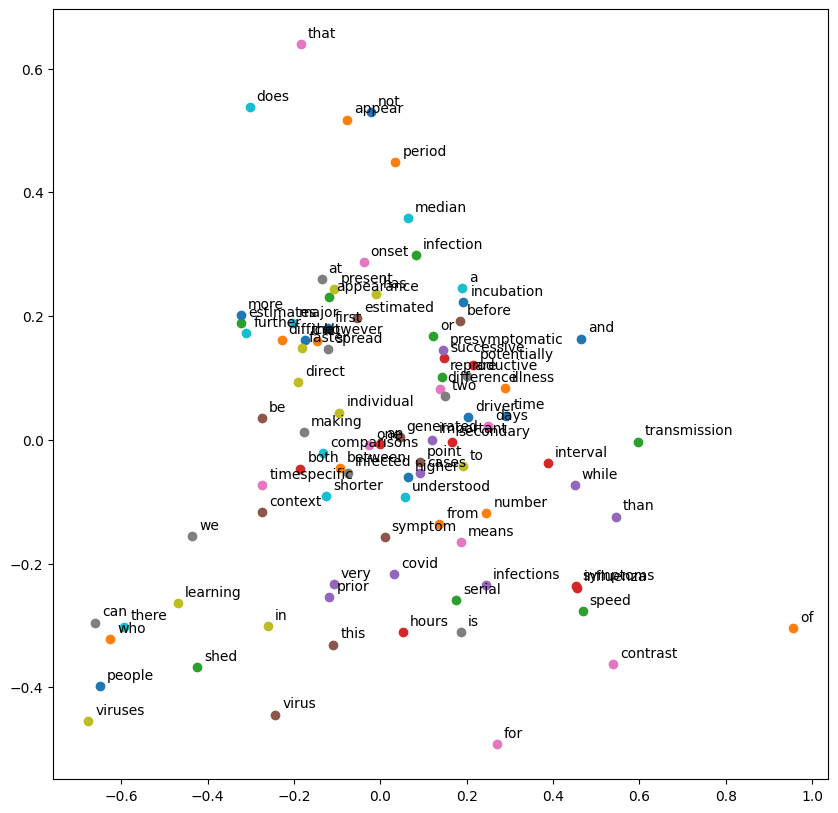

In [17]:
plt.figure(figsize=(10, 10))
for i, word in enumerate(tokenizer.word_index.keys()):
    x, y = reduced_embeddings[i]
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 5),textcoords='offset points')
plt.show()